<a href="https://colab.research.google.com/github/MarshallVielmetti/AlertAIMonorepo/blob/main/Face_Pose_Estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import cv2
# import dlib
# import numpy as np
# import matplotlib.pyplot as plt

# import _pickle as pkl
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import tensorflow as tf
# from keras.models import load_model
# from keras.callbacks import EarlyStopping

# !pip install tensorflow-addons
# import tensorflow_addons as tfa
# from tensorflow_addons.metrics import CohenKappa
# from tensorflow.keras.metrics import Precision, Recall

# !pip install fer
# from fer import FER

Authorize Access to Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [ ]:
# training_dataset = r'/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/Face Pose Estimator/samples.pkl'
# x, y = pkl.load(open(training_dataset, 'rb'))

Split Data

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x,
#                                                     y,
#                                                     test_size=0.3,
#                                                     random_state=42)
# x_val, x_test, y_val, y_test = train_test_split(x_test,
#                                                 y_test,
#                                                 test_size=0.5, 
#                                                 random_state=42)

# print(x_train.shape, y_train.shape)
# print(x_val.shape, y_val.shape)
# print(x_test.shape, y_test.shape)

Data Normalization

In [ ]:
# std = StandardScaler()
# std.fit(x_train)
# x_train = std.transform(x_train)
# x_val = std.transform(x_val)
# x_test = std.transform(x_test)

Create Model

In [ ]:
# # Hyperparameters
# BATCH_SIZE = 32
# EPOCHS = 500

In [ ]:
# def evaluate_model(history):
#     fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 4), constrained_layout=True)

#     # I hand calculated F1-score since tfa's caused errors
#     f1_scores = []
#     # calculate f1-score from precision and recall
#     for i in range(len(history.history['val_recall'])):
#         if history.history['val_precision'][i] != 0 and history.history['val_recall'][i] != 0:
#             f1_scores.append((2 * history.history['val_precision'][i] * history.history['val_recall'][i]) / (history.history['val_precision'][i] + history.history['val_recall'][i]))

#     for i, metric in enumerate(['acc', 'loss', 'precision', 'recall']):
#         axs[i].plot(history.history[metric])
#         axs[i].plot(history.history['val_' + metric])
#         axs[i].set_title('Model {}'.format(metric.capitalize()))
#         axs[i].set_xlabel('Epochs')
#         axs[i].set_ylabel(metric.capitalize())
#         axs[i].legend(['Training', 'Validation'])
        
#         if metric is not 'loss':
#             non_zeros = [num for num in history.history['val_' + metric] if num != 0]
#             avg = "{:.4f}".format(np.mean(non_zeros))
#             std = "{:.4f}".format(np.std(non_zeros))
#             se = "{:.4f}".format(float(std) / (943 ** 0.5))
#             print(metric + ': {} ± {}'.format(avg, se))
    
#     # print f1-score
#     f1_score = "{:.4f}".format(f1_scores[-1])
#     avg = "{:.4f}".format(np.mean(f1_scores))
#     std = "{:.4f}".format(np.std(f1_scores))
#     se = "{:.4f}".format(float(std) / (943 ** 0.5))
#     print('final f1-score: ' + f1_score)
#     print('f1-score' + ': {} ± {}'.format(avg, se))

In [ ]:
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(units=20,
#                 activation='relu',
#                 kernel_regularizer='l2',
#                 input_dim=x.shape[1]))

# model.add(tf.keras.layers.Dense(units=10,
#                 activation='relu',
#                 kernel_regularizer='l2'))

# model.add(tf.keras.layers.Dense(units=3,
#                 activation='linear'))

# print(model.summary())

Train the Model

In [ ]:
# METRICS = ['accuracy',
#            Precision(name='precision'),
#            Recall(name='recall')]
#           #  CohenKappa(num_classes=2)]

# callback_list = [EarlyStopping(monitor='val_acc',
#                               min_delta=1e-5,
#                               patience=20,
#                               mode='max')]

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
#               loss='mean_squared_error',
#               metrics=METRICS)

# hist = model.fit(x=x_train,
#                  y=y_train,
#                  validation_data=(x_val, y_val),
#                  batch_size=BATCH_SIZE,
#                  epochs=EPOCHS,
#                  callbacks=callback_list)

In [ ]:
# evaluate_model(hist)

In [ ]:
# model.save(model_filepath)

Evaluate Model

In [ ]:
# testing_img_path = r'/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/Face Pose Estimator/Testing Images/distracted2.jpg'

# img = cv2.imread(testing_img_path, cv2.IMREAD_COLOR)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Facial Expression Recognition
Implementation of the FER Libr


In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
# with open("testing_img.jpg", "rb") as img_file:
#     # Function will be passed an already encoded string
#     focus_score = compute_focus(encoded_string=base64.b64encode(img_file.read()))
#     print(focus_score)

# img_file.close()

In [ ]:
def compute_focus(model, detector, predictor, data_standardizer, facial_expression_recog_engine, testing_img_path):
    try:
      img = cv2.imread(testing_img_path, cv2.IMREAD_COLOR)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    except:
      print('Warning: Invalid filepath.')    

    face_rect = detector(img, 1)
    if len(face_rect) != 1:
        print('Warning: Multiple faces detected.')
    dlib_points = predictor(img, face_rect[0])
    face_points = []
    for i in range(68):
        x, y = dlib_points.part(i).x, dlib_points.part(i).y
        face_points.append(np.array([x, y]))

    assert (len(face_points) == 68), "Face Points Mismatch"
    
    face_points = np.array(face_points)
    features = []
    for i in range(68):
        for j in range(i + 1, 68):
            features.append(np.linalg.norm(face_points[i] - face_points[j]))
    
    features = np.array(features).reshape(1, -1)

    for x, y in face_points:
        cv2.circle(img, (x, y), 1, (0, 255, 0), -1)
        
    try:
        features = data_standardizer.transform(features)
        located_face_points = True
    except:
        located_face_points = False

    y_pred = model.predict(features)
    roll, pitch, yaw = y_pred[0]

    # emotions predictor + bounding box (face detection) + neutral emotion
    emotions = facial_expression_recog_engine.detect_emotions(img)
    neutral = emotions[0]['emotions']['neutral']
    distracted_score = ((neutral + 0.6) ** 2)
    print(distracted_score)
    bb_coordinates = emotions[0]['box']
    x, y, w, h = bb_coordinates
    xmin = x
    xmax = x + w
    ymin = y
    ymax = y + h
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

    # Calculate an overall percentage describing the student's focus/attention level
    # we need abs val because python doesn't handle exponents well on negative #'s --> complex #'s
    distracted_score += abs(roll)**1.35 + abs(pitch)**1.2 + abs(yaw)**1.55
    UNFOCUSED_THRESHOLD = 32

    if distracted_score > UNFOCUSED_THRESHOLD:
        status = 'Not Focused'
    else:
        status = 'Focused'
        
    plt.figure(figsize=(18, 18))
    font_settings = {'family': 'DejaVu Sans',
                      'color' : 'red',
                      'weight': 'heavy',
                      'size'  :  20}

    plt.title(status, fontdict=font_settings)

    if located_face_points:
        font_settings.update({'color' : 'lime', 'size': 14})
        plt.text(15, 20, 'Identified Face Points', fontdict=font_settings)
    else:
        font_settings.update({'color' : 'firebrick', 'size': 14})
        plt.text(15, 20, 'Unidentifiable Face Points', fontdict=font_settings)

    font_settings.update({'color': 'red'})
    plt.text(15, 40, 'Roll:   {:.2f}°'.format(roll), fontdict=font_settings)
    font_settings.update({'color': 'green'})
    plt.text(15, 60, 'Pitch: {:.2f}°'.format(pitch), fontdict=font_settings)
    font_settings.update({'color': 'blue'})
    plt.text(15, 80, 'Yaw:   {:.2f}°'.format(yaw), fontdict=font_settings)

    plt.axis('off')
    plt.imshow(img)
    plt.show()
    
    return distracted_score

In [ ]:
import _pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
!pip install fer
from fer import FER

In [ ]:
model_filepath = r'/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/Face Pose Estimator/models'
shape_predictor_path = r'/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/Face Pose Estimator/models/shape_predictor_68_face_landmarks.dat'
model = load_model(model_filepath)
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor_path)

training_dataset = r'/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/Face Pose Estimator/samples.pkl'
x, y = pkl.load(open(training_dataset, 'rb'))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
data_standardizer = StandardScaler()
data_standardizer.fit(x_train)

facial_expression_recog_engine = FER(mtcnn=True)

09-08-2021:02:56:14,754 WARNING  [load.py:121] SavedModel saved prior to TF 2.5 detected when loading Keras model. Please ensure that you are saving the model with model.save() or tf.keras.models.save_model(), *NOT* tf.saved_model.save(). To confirm, there should be a file named "keras_metadata.pb" in the SavedModel directory.


Instructions for updating:
Colocations handled automatically by placer.


09-08-2021:02:56:27,191 WARNING  [deprecation.py:336] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/normalization.py:534: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


0.4623999999999999


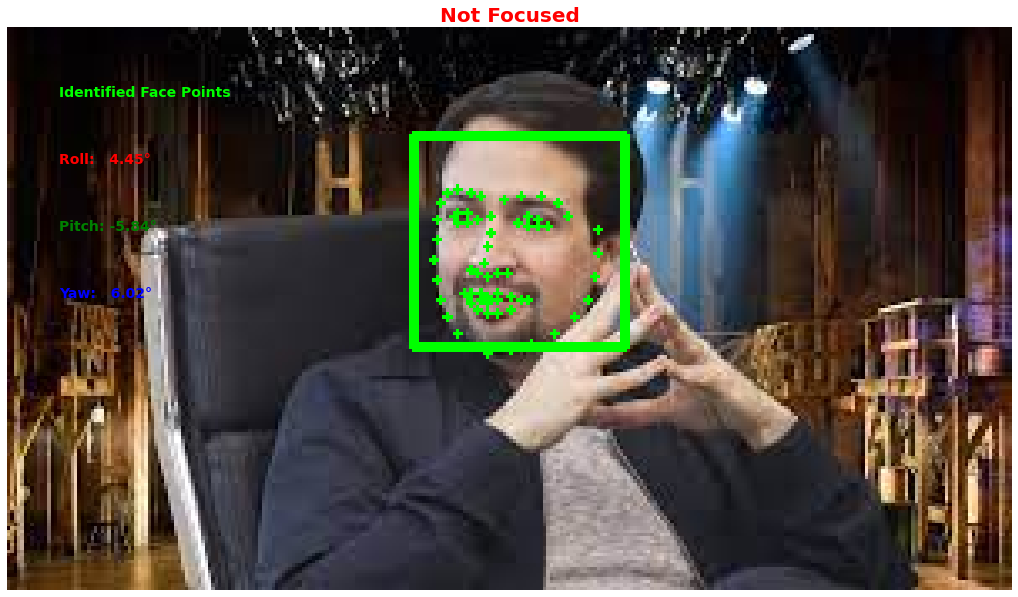

32.426868959407464


In [ ]:
testing_img_path = r'/content/drive/MyDrive/Colab Notebooks/MIT Blueprint 2021/Face Pose Estimator/Testing Images/unfocused side.jpg'
focus_score = compute_focus(model, detector, predictor, data_standardizer, facial_expression_recog_engine, testing_img_path)
print(focus_score)